# Task 1. Image classification + OOP

This notebook demonstrates how to use MNIST classification solution.

## Initial loading of libraries

In [1]:
# Import required libraries and modules.
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn import metrics
import cv2

# Import the class for MNIST classifiers.
from mnist_classifier import MnistClassifier
from classifiers.cnn_classifier import CNNMnistClassifier

## Data loading

In [2]:
# Load the MNIST dataset.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

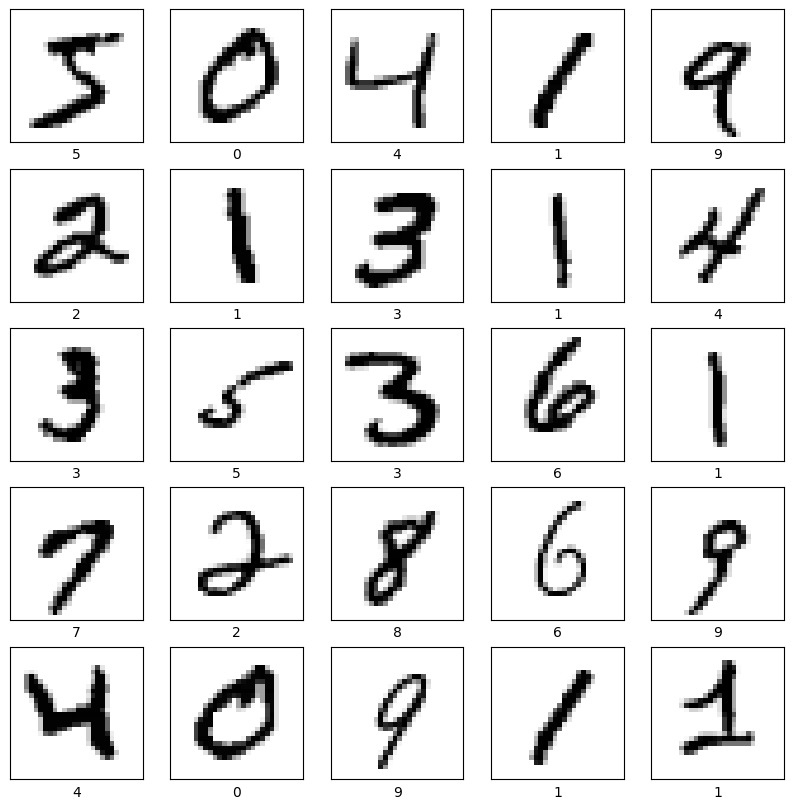

In [3]:
# Display part of the training data in 5x5 format.
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

## Random Forest Classifier

In [4]:
# Instantiate the Random Forest classifier.
rf_classifier = MnistClassifier(algorithm='rf')

In [5]:
# Train on the training set.
rf_classifier.train(X_train, y_train)

Random Forest training complete.


In [6]:
# Predict on the test set.
predictions_rf = rf_classifier.predict(X_test)
accuracy_rf = np.mean(predictions_rf == y_test)
print("Random Forest Accuracy:", accuracy_rf)

Random Forest Accuracy: 0.9699


## Feed-Forward Neural Network

In [7]:
# Instantiate the Feed-Forward Neural Network classifier (you can adjust parameters like epochs or batch_size via kwargs).
nn_classifier = MnistClassifier(algorithm='nn')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/5
1875/1875 [==============================] - 2s 908us/step - loss: 0.2604 - accuracy: 0.9251
Epoch 2/5
1875/1875 [==============================] - 2s 889us/step - loss: 0.1174 - accuracy: 0.9650
Epoch 3/5
1875/1875 [==============================] - 2s 887us/step - loss: 0.0802 - accuracy: 0.9757
Epoch 4/5
1875/1875 [==============================] - 2s 871us/step - loss: 0.0610 - accuracy: 0.9816
Epoch 5/5
1875/1875 [==============================] - 2s 905us/step - loss: 0.0469 - accuracy: 0.9854
Feed-Forward NN training complete.


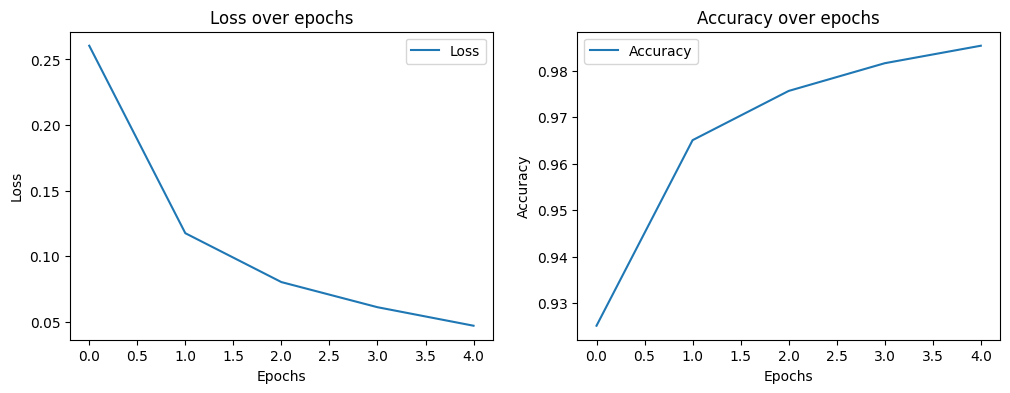

In [8]:
# Train the Feed-Forward Neural Network model.
nn_classifier.train(X_train, y_train)

In [9]:
# Predict on the test set.
predictions_nn = nn_classifier.predict(X_test)
accuracy_nn = np.mean(predictions_nn == y_test)
print("Feed-Forward Neural Network Accuracy:", accuracy_nn)

313/313 [==============================] - 0s 583us/step
Feed-Forward Neural Network Accuracy: 0.9773


## Convolutional Neural Network

In [10]:
# Instantiate and train the Convolutional Neural Network classifier (you can adjust parameters like epochs or batch_size via kwargs).
cnn_classifier = MnistClassifier(algorithm='cnn')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1264 - accuracy: 0.9621
Epoch 2/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0422 - accuracy: 0.9861
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0293 - accuracy: 0.9908
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0209 - accuracy: 0.9935
Epoch 5/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0149 - accuracy: 0.9952
CNN training complete.


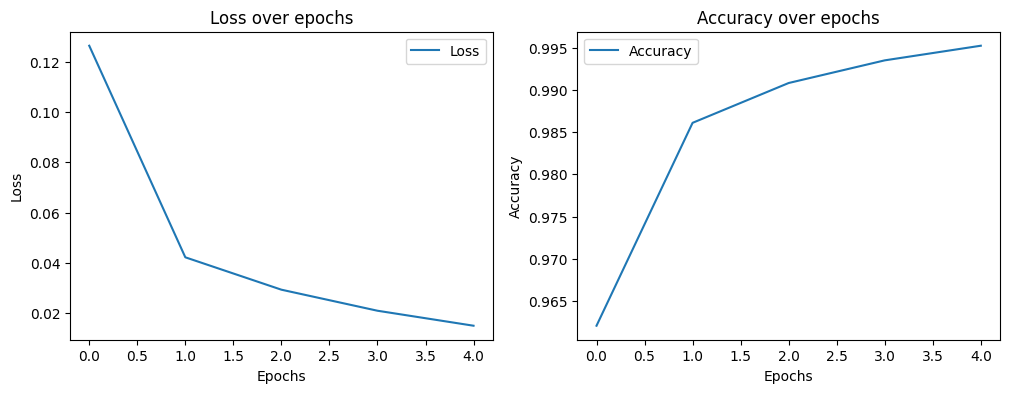

In [11]:
# Train the Convolutional Neural Network model.
cnn_classifier.train(X_train, y_train)

In [12]:
# Predict on the test set.
predictions_cnn = cnn_classifier.predict(X_test)
accuracy_cnn = np.mean(predictions_cnn == y_test)
print("Convolutional Neural Network Accuracy:", accuracy_cnn)

313/313 [==============================] - 1s 2ms/step
Convolutional Neural Network Accuracy: 0.9906


## Confusion matrices

In [13]:
# Compute confusion matrices for each model.
cm_rf = metrics.confusion_matrix(y_test, predictions_rf)
cm_nn = metrics.confusion_matrix(y_test, predictions_nn)
cm_cnn = metrics.confusion_matrix(y_test, predictions_cnn)

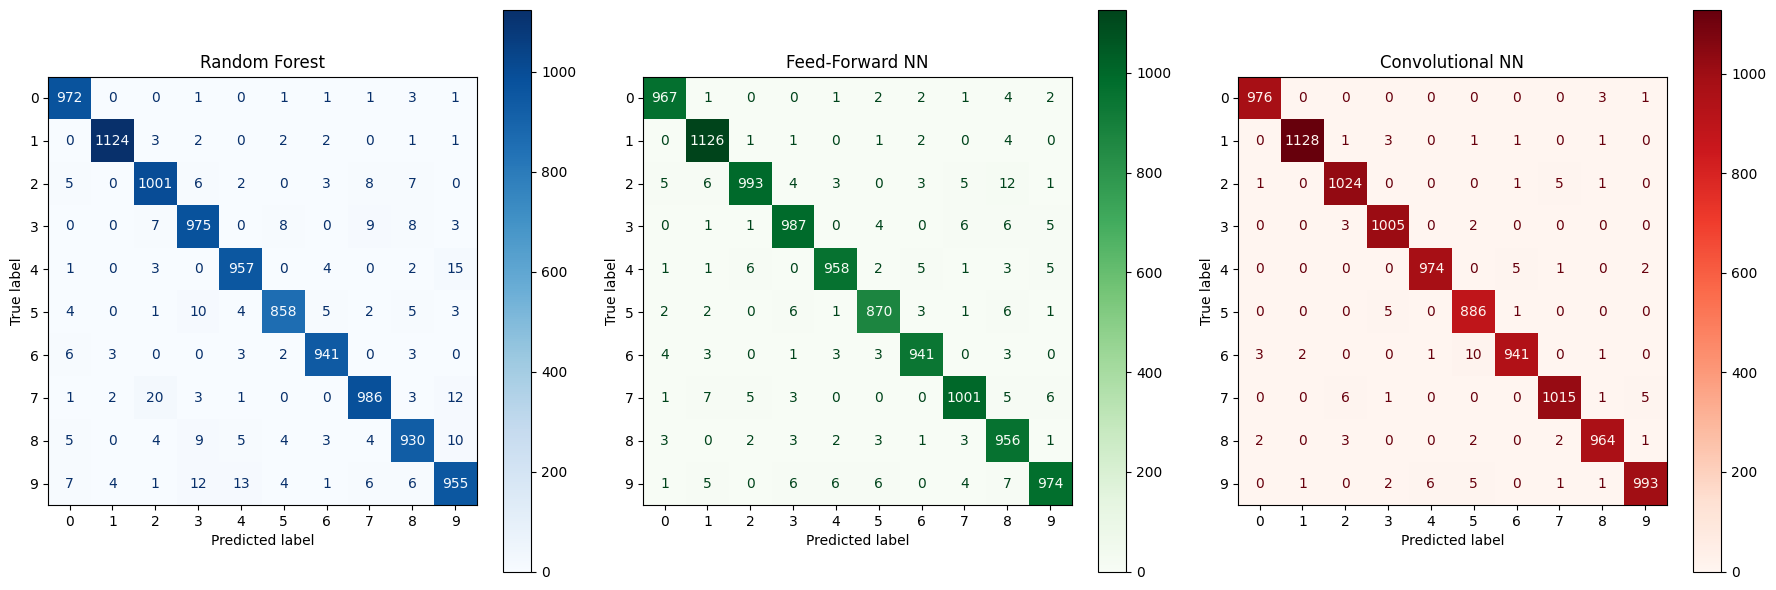

In [14]:
# Create a figure with 3 subplots side by side.
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Display the confusion matrix for Random Forest.
disp_rf = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=np.unique(y_test))
disp_rf.plot(ax=axes[0], cmap=plt.cm.Blues)
axes[0].set_title("Random Forest")

# Display the confusion matrix for Feed-Forward Neural Network.
disp_nn = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_nn, display_labels=np.unique(y_test))
disp_nn.plot(ax=axes[1], cmap=plt.cm.Greens)
axes[1].set_title("Feed-Forward NN")

# Display the confusion matrix for Convolutional Neural Network.
disp_cnn = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_cnn, display_labels=np.unique(y_test))
disp_cnn.plot(ax=axes[2], cmap=plt.cm.Reds)
axes[2].set_title("Convolutional NN")

plt.tight_layout()
plt.show()

## Predictions based on your own image

In [15]:
# Function to predict based on your own image.
def preprocess_and_predict_image(image, classifier):
    image = cv2.resize(image, (28, 28))

    # Check the type of model in the classifier
    if isinstance(classifier.classifier, CNNMnistClassifier):
        # If CNN, reshape the image to include channel dimension (28, 28, 1)
        image = image.reshape(1, 28, 28, 1)
    else:
        # If Feed-Forward NN (or any other non-CNN), keep it as (28, 28)
        image = image.reshape(1, 28, 28)
    print(classifier.predict(image))

In [16]:
# Predict
path = 'image.jpg'
preprocess_and_predict_image(cv2.imread(path, 0), cnn_classifier)

1/1 [==============================] - 0s 12ms/step
[8]


## Some conclusions)

The results show that the convolutional neural network (CNN) achieved the highest accuracy of 0.9906, outperforming both the feedforward neural network (FFNN) and the random forest classifier. FFNN achieved an accuracy of 0.9773, while the Random Forest classifier had an accuracy of 0.9699. The random forest was the least accurate of the three models, which can be explained by its limitations in processing image data compared to deep learning models. According to the confusion matrices, the models most often confused 2 and 7, 4 and 9, and 3 and 9. This is especially evident in the random forest.